In [1]:
import lightgbm as lgb
import shap
import pickle
import json

model = pickle.load(open('2021-01-06_11:06:47_2e5c973a-5039-11eb-b2ec-557c888421ed/model.pkl','rb'))[0]
metadata = json.load(open('2021-01-06_11:06:47_2e5c973a-5039-11eb-b2ec-557c888421ed/metadata.json','r'))
feature_used = metadata['feature_names']
len(feature_used),metadata['dev_df_hash'],metadata['dev_jar_hash'],metadata['dev_fe_hash']

(336,
 '0x246c1ac1895140b3',
 '32fc21573a1a23df70d0aef0f4d588d7',
 'bccad645deb97e4d63f80cc992e75951')

In [2]:
dev_extracted = pickle.load(open(f'dev_0x246c1ac1895140b3_32fc21573a1a23df70d0aef0f4d588d7_bccad645deb97e4d63f80cc992e75951.pickle', 'rb'))
X = dev_extracted['data'].loc[:, feature_used].sample(frac=0.1, random_state=12345)

In [3]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

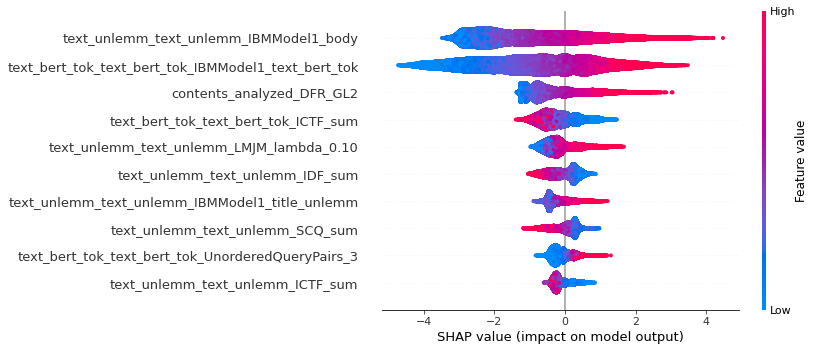

In [4]:
shap.summary_plot(shap_values, X, max_display=10)

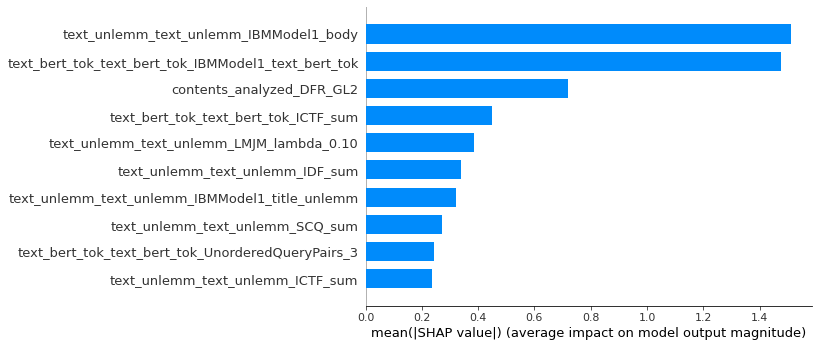

In [5]:
shap.summary_plot(shap_values, X, plot_type="bar", max_display=10)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

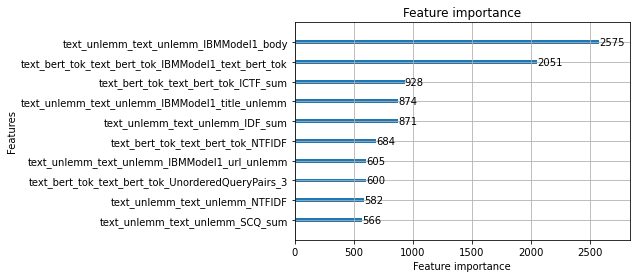

In [6]:
lgb.plot_importance(model, max_num_features=10)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

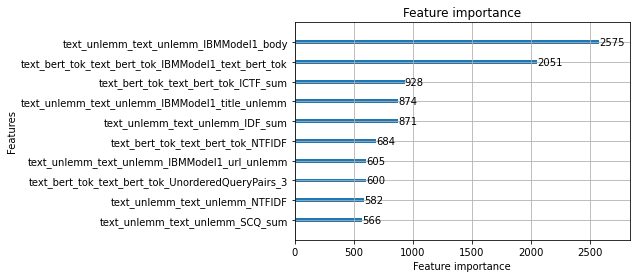

In [7]:
lgb.plot_importance(model, max_num_features=10, importance_type='split')